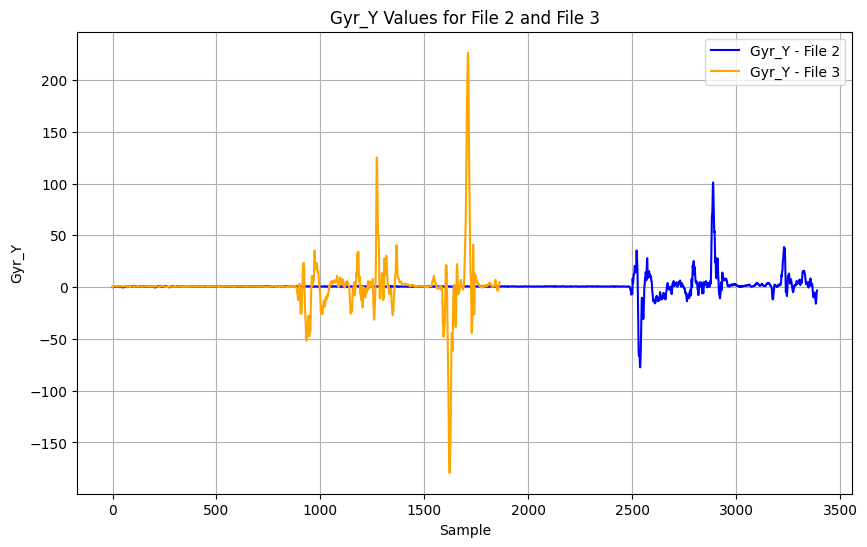

Improvement from File 1 to File 2 (%):
 Acc_X    21.562431
Acc_Y    24.020399
Acc_Z    17.426790
Gyr_X    45.365744
Gyr_Y    23.244602
Gyr_Z    44.352140
dtype: float64
Improvement from File 2 to File 3 (%):
 Acc_X    -87.109226
Acc_Y    -67.381000
Acc_Z    -31.210784
Gyr_X   -359.104259
Gyr_Y   -844.402642
Gyr_Z   -117.115328
dtype: float64
Overall improvement from File 1 to File 2:29.33%
Overall improvement from File 2 to File 3:-251.05%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load multiple CSV files
file_1 = r'IMU Exported Data\Drink Task\Trial 1\A_D422CD00606D_20240314_113325.csv'
file_2 = r'IMU Exported Data\Drink Task\Trial 2\A_D422CD00606D_20240314_114057.csv'
file_3 = r'IMU Exported Data\Drink Task\Trial 3\A_D422CD00606D_20240314_114443.csv'

# Function to load and extract the Gyr_Y column
def load_gyr_y(file_path):
    data = pd.read_csv(file_path, skiprows=7)
    return data['Gyr_Y']

# Load Gyr_Y values for file 2 and 3
gyr_y_file_2 = load_gyr_y(file_2)
gyr_y_file_3 = load_gyr_y(file_3)

# Plot Gyr_Y for both files
plt.figure(figsize=(10, 6))
plt.plot(gyr_y_file_2, label='Gyr_Y - File 2', color='blue')
plt.plot(gyr_y_file_3, label='Gyr_Y - File 3', color='orange')
plt.xlabel('Sample')
plt.ylabel('Gyr_Y')
plt.title('Gyr_Y Values for File 2 and File 3')
plt.legend()
plt.grid(True)
plt.show()

# Define a function to load and calculate variance for relevant columns
def load_and_process(file_path):
    # Load the file
    data = pd.read_csv(file_path, skiprows = 7)
    
    # Extract relevant columns (Acc_X, Acc_Y, Acc_Z, Gyr_X, Gyr_Y, Gyr_Z)
    relevant_columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
    features = data[relevant_columns]
    
    # Calculate variance (as a measure of smoothness)
    variances = features.var()
    
    return variances

# Process each CSV file
variances_1 = load_and_process(file_1)  # Baseline
variances_2 = load_and_process(file_2)
variances_3 = load_and_process(file_3)

# Calculate improvement from File 1 (baseline) to File 2 and File 3
def calculate_improvement(baseline, current):
    improvement = (baseline - current) / baseline * 100
    return improvement

# Calculate improvement for File 2 and File 3 compared to File 1
improvement_2 = calculate_improvement(variances_1 + 1, variances_2 + 1)
improvement_3 = calculate_improvement(variances_2 + 1, variances_3 + 1)

# Print results
print("Improvement from File 1 to File 2 (%):\n", improvement_2)
print("Improvement from File 2 to File 3 (%):\n", improvement_3)

# Optionally, calculate overall improvement (mean percentage improvement across all axes)
overall_improvement_2 = improvement_2.mean()
overall_improvement_3 = improvement_3.mean()

print(f"Overall improvement from File 1 to File 2:{overall_improvement_2:.2f}%")
print(f"Overall improvement from File 2 to File 3:{overall_improvement_3:.2f}%")